In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now()}')

Päivitetty 2024-03-22 15:11:12.773353


<h2>Econdb - The Database of Economic Indicators</h2>

Econdb https://www.econdb.com/ sisältää talouteen liittyviä indikaattoreita (Inflation, Real GDP, Industrial production jne.). Sieltä voit hakea tietyn aikasarjan ja Export-toiminnolla saat Python koodin aikasarjan noutamiseksi Pythoniin.

Seuraavaa esimerkkiä varten valitsin Econdb:n etusivulta indikaattoriksi Real GDP ja tämän jälkeen alueeksi Europe - Finland. Vastaavalla tavalla etsin Ruotsin bkt:n liittyvän aikasarjan.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

<h3>Haku tickerin perusteella</h3>

In [3]:
# Suomen bruttokansantuotteen reaaliarvot
df1 = pd.read_csv(
	'https://www.econdb.com/api/series/RGDPFI/?format=csv&token=cf0f7bfc258b3e2385ce8636d8ea32354b4aa389',
	index_col='Date', parse_dates=['Date'])

# Ruotsin bruttokansantuotteen reaaliarvot
df2 = pd.read_csv(
	'https://www.econdb.com/api/series/RGDPSE/?format=csv&token=734cfbaeb40b6158183af0fc4842e14c589bbb83',
	index_col='Date', parse_dates=['Date'])

# Yhdistetään datat ja muutetaan arvot muutosprosenteiksi
df = pd.concat([df1.pct_change()*100, df2.pct_change()*100], axis=1)
df.columns = ['Finland', 'Sweden']
df

,Finland,Sweden
Date,,
1990-01-01,NaN,NaN
1990-04-01,-1.376300,NaN
1990-07-01,-2.142595,NaN
1990-10-01,-0.573305,NaN
1991-01-01,-1.950046,NaN
...,...,...
2022-10-01,-0.647609,-0.963304
2023-01-01,-0.245941,0.730845
2023-04-01,0.544818,-0.684536


Text(0, 0.5, 'Muutosprosentti')

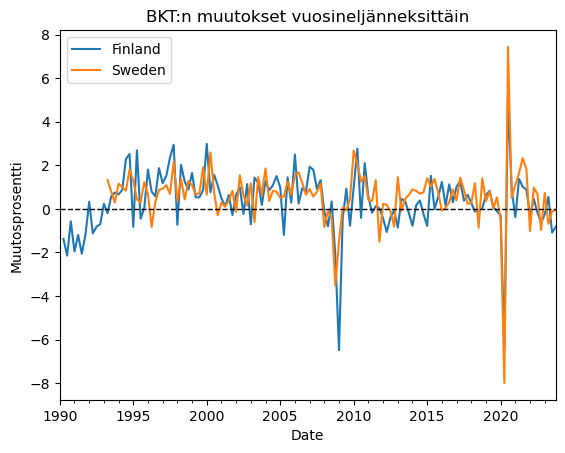

In [4]:
# BKT:n muutosprosentit viivakaaviona

df.plot()
plt.axhline(y=0, color = 'black', linewidth = 1, linestyle = '--')
plt.title('BKT:n muutokset vuosineljänneksittäin')
plt.ylabel('Muutosprosentti')